<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/titanic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [583]:
train = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/titanic_train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/titanic_test.csv')
submit = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/gender_submission.csv')

In [35]:
train.head()

0    523
1    596
2    669
3     49
4    472
Name: Ticket, dtype: object

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [584]:
train['Title'] = train.Name.apply(lambda x: x.split(', ')[1].split('.')[0])

In [585]:
test['Title'] = test.Name.apply(lambda x: x.split(', ')[1].split('.')[0])

In [512]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [513]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [586]:
train['Title'].replace(['Dr','Rev','Major', 'Col', 'Jonkheer', 'Countess', 'Sir', 'Don', 'Capt', 'Dona', 'the Countess'], 'Rare', inplace=True)
train['Title'].replace(['Mlle','Ms','Lady'], 'Miss', inplace=True)
train['Title'].replace('Mme', 'Mrs', inplace=True)
test['Title'].replace(['Dr','Rev','Major', 'Col', 'Jonkheer', 'Countess', 'Sir', 'Don', 'Capt', 'Dona'], 'Rare', inplace=True)
test['Title'].replace(['Mlle','Ms','Lady'], 'Miss', inplace=True)
test['Title'].replace('Mme', 'Mrs', inplace=True)

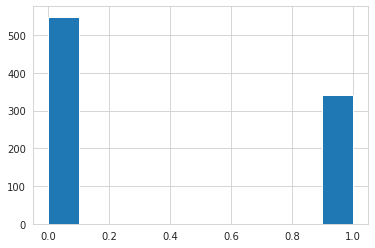

In [44]:
train.Survived.hist()

In [515]:
def missing(data):
  missing_sum = data.isnull().sum()
  missing_percent = round(missing_sum/len(data)*100, 2)

  missing_table = pd.concat([missing_sum, missing_percent], axis=1, keys=['Sum', 'Percent']).sort_values(by='Percent', ascending=False)
  return missing_table

In [56]:
missing(train)

,Sum,Percent
Age,177,19.87
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00
Embarked,0,0.00


In [57]:
missing(test)

,Sum,Percent
Age,86,20.57
PassengerId,0,0.00
Pclass,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00
Embarked,0,0.00
Title,0,0.00


In [59]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title


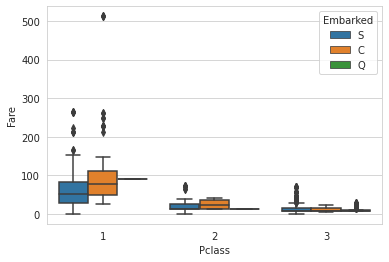

In [ ]:
sns.boxplot(x=train['Pclass'], y=train['Fare'], hue=train['Embarked'])

In [587]:
train['Embarked'].fillna('C', inplace=True)

In [49]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [588]:
test.loc[(test['Fare'].isnull()), 'Fare'] = test[(test.Pclass==3)&(test.Embarked=='S')]['Fare'].mean()

In [589]:
train = train.drop(['Name', 'Cabin'], axis=1)
test = test.drop(['Name', 'Cabin'], axis=1)

In [590]:
train['Ticket'] = train['Ticket'].astype('str')
test['Ticket'] = test['Ticket'].astype('str')

In [24]:
from sklearn.preprocessing import LabelEncoder

In [53]:
train.select_dtypes('object').columns

Index(['Sex', 'Ticket', 'Embarked', 'Title'], dtype='object')

In [594]:
for i in train.select_dtypes(include='object').columns:
  encoders = LabelEncoder()
  train[i] = encoders.fit_transform(train[i])

In [593]:
for i in test.select_dtypes(include='object').columns:
  encoders = LabelEncoder()
  test[i] = encoders.fit_transform(test[i])

In [595]:
## Age 채우기 준비
train_Age = train.Age
test_Age = test.Age

In [596]:
train = train.drop(['Age'], axis=1)
test = test.drop(['Age'],axis=1)

In [597]:
train = pd.concat([train_Age, train], axis=1)
test = pd.concat([test_Age, test], axis=1)

In [598]:
train_Survived = train.Survived

In [599]:
train = train.drop(['Survived'], axis=1)

In [600]:
train = pd.concat([train_Survived, train], axis=1)

In [136]:
train

,Survived,Survived,Age,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,0,22.000000,3,1,1,0,523,7.2500,2,2
1,1,1,38.000000,1,0,1,0,596,71.2833,0,3
2,1,1,26.000000,3,0,0,0,669,7.9250,2,1
3,1,1,35.000000,1,0,1,0,49,53.1000,2,3
4,0,0,35.000000,3,1,0,0,472,8.0500,2,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.000000,2,1,0,0,101,13.0000,2,4
887,1,1,19.000000,1,0,0,0,14,30.0000,2,1
888,0,0,11.797771,3,0,1,2,675,23.4500,2,1
889,1,1,26.000000,1,1,0,0,8,30.0000,0,2


In [601]:
train_notnull = train[train['Age'].notnull()]
train_notnull_x = train_notnull.loc[:,'Pclass':]
train_notnull_y = train_notnull['Age']

In [602]:
test_isnull = train[train['Age'].isnull()]
test_isnull_x = test_isnull.loc[:,'Pclass':]
test_isnull_y = test_isnull['Age']

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgbm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, cohen_kappa_score

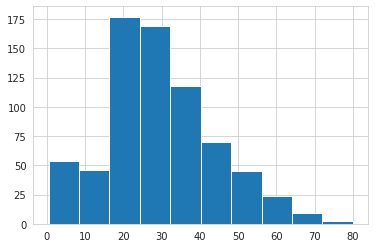

In [69]:
train_Age.hist()

In [603]:
model_rf_age = RandomForestRegressor(n_estimators=500, n_jobs=-1)
model_rf_age.fit(train_notnull_x, train_notnull_y)
y_pred_age = model_rf_age.predict(test_isnull_x)

In [604]:
train.loc[train.Age.isnull(), 'Age'] = y_pred

In [605]:
test_train_notnull = test[test['Age'].notnull()]
test_train_notnull_x = test_train_notnull.loc[:,'Pclass':]
test_train_notnull_y = test_train_notnull['Age']

test_test_isnull = test[test['Age'].isnull()]
test_test_isnull_x = test_test_isnull.loc[:,'Pclass':]
test_test_isnull_y = test_test_isnull['Age']

model_rf_age.fit(test_train_notnull_x, test_train_notnull_y)
y_pred_test = model_rf_age.predict(test_test_isnull_x)

test.loc[test.Age.isnull(), 'Age'] = y_pred_test

In [606]:
train = pd.concat([train_Survived, train], axis=1)

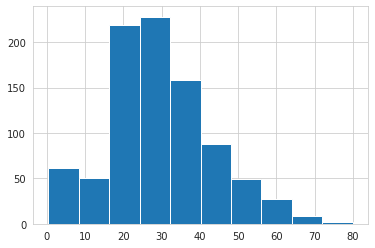

In [115]:
train.Age.hist()

In [544]:
train = train.drop(['PassengerId'], axis=1)
test = test.drop(['PassengerId'], axis=1)

In [607]:
train['Total_people'] = train['SibSp'] + train['Parch'] + 1
test['Total_people'] = test['SibSp'] + test['Parch'] + 1

In [608]:
train['Personal_Charges'] = train['Fare'] / train['Total_people']
test['Personal_Charges'] = test['Fare'] / test['Total_people']

In [616]:
x = train.drop(['Survived'], axis=1)
y = train['Survived']

In [617]:
from imblearn.over_sampling import SMOTE
x, y = SMOTE().fit_sample(x, y)

In [618]:
from sklearn.preprocessing import robust_scale
x = pd.DataFrame(robust_scale(x), columns=train.drop(['Survived'], axis=1).columns)

In [620]:
test_passengerid = test['PassengerId']

In [621]:
test = pd.DataFrame(robust_scale(test), columns=test.columns)

In [461]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=1234)

accuracy: 0.7890909090909091
cohen_kappa_score: 0.5785329246379876
roc_auc_score: 0.7895418958950486
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       136
           1       0.82      0.75      0.78       139

    accuracy                           0.79       275
   macro avg       0.79      0.79      0.79       275
weighted avg       0.79      0.79      0.79       275



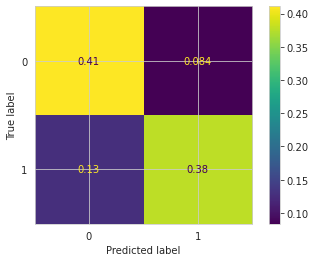

In [463]:
model_logistic = LogisticRegression(C=.8)
model_logistic.fit(x_train, y_train)
y_pred_logistic = model_logistic.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_logistic))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_logistic))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
plot_confusion_matrix(model_logistic, x_test, y_test, normalize='all')

accuracy: 0.7709090909090909
cohen_kappa_score: 0.5424534530569127
roc_auc_score: 0.7716356326703344
              precision    recall  f1-score   support

           0       0.74      0.84      0.78       136
           1       0.82      0.71      0.76       139

    accuracy                           0.77       275
   macro avg       0.78      0.77      0.77       275
weighted avg       0.78      0.77      0.77       275



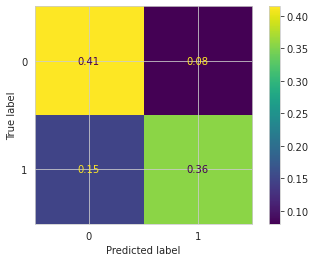

In [464]:
model_svc_lin = SVC(C=.8, kernel='linear', )
model_svc_lin.fit(x_train, y_train)
y_pred_svc_lin = model_svc_lin.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_svc_lin))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_svc_lin))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_svc_lin))
print(classification_report(y_test, y_pred_svc_lin))
plot_confusion_matrix(model_svc_lin, x_test, y_test, normalize='all')

accuracy: 0.8072727272727273
cohen_kappa_score: 0.614591321363408
roc_auc_score: 0.8073688108336861
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       136
           1       0.82      0.80      0.81       139

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275



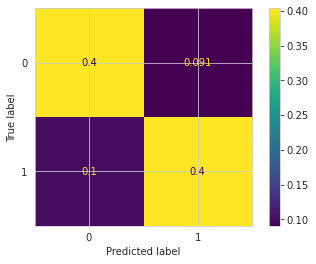

In [465]:
model_svc_rbf = SVC(C=.8, kernel='rbf', )
model_svc_rbf.fit(x_train, y_train)
y_pred_svc_rbf = model_svc_rbf.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_svc_rbf))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_svc_rbf))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_svc_rbf))
print(classification_report(y_test, y_pred_svc_rbf))
plot_confusion_matrix(model_svc_rbf, x_test, y_test, normalize='all')

accuracy: 0.8254545454545454
cohen_kappa_score: 0.6507566938300349
roc_auc_score: 0.8252750740584004
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       136
           1       0.82      0.84      0.83       139

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275



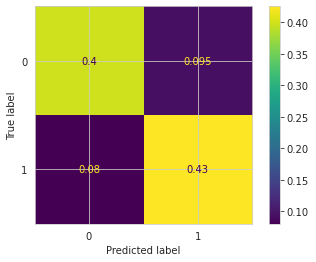

In [466]:
model_decision = DecisionTreeClassifier(max_depth=8)
model_decision.fit(x_train, y_train)
y_pred_decision = model_decision.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_decision))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_decision))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_decision))
print(classification_report(y_test, y_pred_decision))
plot_confusion_matrix(model_decision, x_test, y_test, normalize='all')

accuracy: 0.8618181818181818
cohen_kappa_score: 0.7236034701650444
roc_auc_score: 0.8618017350825222
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       136
           1       0.86      0.86      0.86       139

    accuracy                           0.86       275
   macro avg       0.86      0.86      0.86       275
weighted avg       0.86      0.86      0.86       275



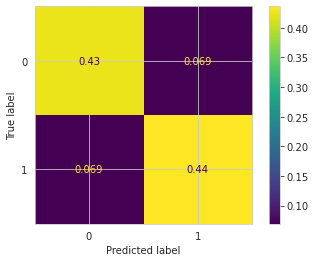

In [467]:
model_rf = RandomForestClassifier(max_depth=7)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_rf))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_rf))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(model_rf, x_test, y_test, normalize='all')

In [480]:
score_rf = {}
for i in range(1, 11, 1):
  model_rf = RandomForestClassifier(n_estimators=500, max_depth=i)
  model_rf.fit(x_train, y_train)
  y_pred_rf = model_rf.predict(x_test)
  score_rf[i] = accuracy_score(y_test, y_pred_rf)
score_rf

{1: 0.7963636363636364,
 2: 0.8327272727272728,
 3: 0.8363636363636363,
 4: 0.850909090909091,
 5: 0.8581818181818182,
 6: 0.8581818181818182,
 7: 0.850909090909091,
 8: 0.850909090909091,
 9: 0.8618181818181818,
 10: 0.8727272727272727}

accuracy: 0.8763636363636363
cohen_kappa_score: 0.7527370815042048
roc_auc_score: 0.8764282691493863
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       136
           1       0.88      0.87      0.88       139

    accuracy                           0.88       275
   macro avg       0.88      0.88      0.88       275
weighted avg       0.88      0.88      0.88       275



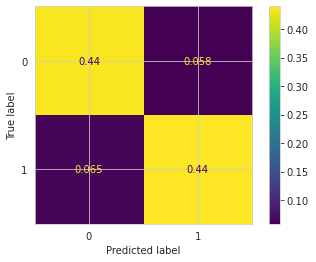

In [472]:
model_xgb = xgb.XGBClassifier(n_estimators=300, learning_rate=0.09, max_depth=2)
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_xgb))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_xgb))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
plot_confusion_matrix(model_xgb, x_test, y_test, normalize='all')

In [471]:
score_xgb = {}
for i in np.arange(0.01,0.11,0.01):
  model_xgb = xgb.XGBClassifier(n_estimators=300, learning_rate=i, max_depth=2)
  model_xgb.fit(x_train, y_train)
  y_pred_xgb = model_xgb.predict(x_test)
  score_xgb[i] = accuracy_score(y_test, y_pred_xgb)
score_xgb

{0.01: 0.850909090909091,
 0.02: 0.8472727272727273,
 0.03: 0.8545454545454545,
 0.04: 0.8654545454545455,
 0.05: 0.8618181818181818,
 0.060000000000000005: 0.8581818181818182,
 0.06999999999999999: 0.8727272727272727,
 0.08: 0.8690909090909091,
 0.09: 0.8763636363636363,
 0.09999999999999999: 0.8690909090909091}

accuracy: 0.8545454545454545
cohen_kappa_score: 0.7091024488284763
roc_auc_score: 0.8546074904782057
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       136
           1       0.86      0.85      0.86       139

    accuracy                           0.85       275
   macro avg       0.85      0.85      0.85       275
weighted avg       0.85      0.85      0.85       275



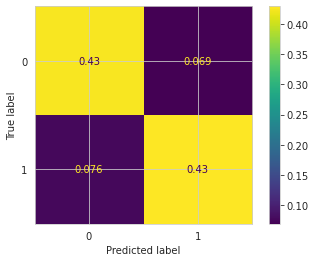

In [473]:
model_lgbm = lgbm.LGBMClassifier()
model_lgbm.fit(x_train, y_train)
y_pred_lgbm = model_lgbm.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_lgbm))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_lgbm))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))
plot_confusion_matrix(model_lgbm, x_test, y_test, normalize='all')

In [475]:
score_lgbm = {}
for i in np.arange(0.01,0.11,0.01):
  model_lgbm = lgbm.LGBMClassifier(learning_rate=i, n_estimators=300)
  model_lgbm.fit(x_train, y_train)
  y_pred_lgbm = model_lgbm.predict(x_test)
  score_lgbm[i] = accuracy_score(y_test, y_pred_lgbm)
score_lgbm

{0.01: 0.8545454545454545,
 0.02: 0.8618181818181818,
 0.03: 0.8472727272727273,
 0.04: 0.8472727272727273,
 0.05: 0.84,
 0.060000000000000005: 0.850909090909091,
 0.06999999999999999: 0.8472727272727273,
 0.08: 0.8545454545454545,
 0.09: 0.8472727272727273,
 0.09999999999999999: 0.8472727272727273}

accuracy: 0.8545454545454545
cohen_kappa_score: 0.7090562843842573
roc_auc_score: 0.8545281421921287
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       136
           1       0.86      0.86      0.86       139

    accuracy                           0.85       275
   macro avg       0.85      0.85      0.85       275
weighted avg       0.85      0.85      0.85       275



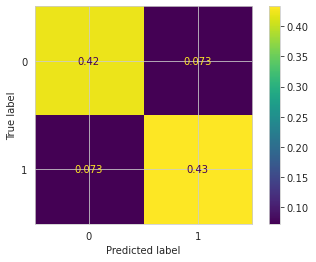

In [476]:
model_extra = ExtraTreesClassifier()
model_extra.fit(x_train, y_train)
y_pred_extra = model_extra.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_extra))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_extra))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_extra))
print(classification_report(y_test, y_pred_extra))
plot_confusion_matrix(model_extra, x_test, y_test, normalize='all')

In [477]:
score_extra = {}
for i in range(1, 11, 1):
  model_extra = ExtraTreesClassifier(max_depth=i)
  model_extra.fit(x_train, y_train)
  y_pred_extra = model_extra.predict(x_test)
  score_extra[i] = accuracy_score(y_test, y_pred_lgbm)
score_extra

{1: 0.8472727272727273,
 2: 0.8472727272727273,
 3: 0.8472727272727273,
 4: 0.8472727272727273,
 5: 0.8472727272727273,
 6: 0.8472727272727273,
 7: 0.8472727272727273,
 8: 0.8472727272727273,
 9: 0.8472727272727273,
 10: 0.8472727272727273}

In [622]:
model_xgb = xgb.XGBClassifier(n_estimators=300, learning_rate=0.09, max_depth=2)
model_xgb.fit(x, y)
y_pred_xgb_submit = model_xgb.predict(test)
xgb_score = round(model_xgb.score(x, y) * 100, 2)
xgb_score

91.89

In [623]:
y_pred_test_xgb = model_xgb.predict(test)

In [624]:
submission = pd.DataFrame({
        "PassengerId": test_passengerid,
        "Survived": y_pred_xgb_submit
    })

In [625]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [626]:
submission.to_csv('/content/drive/MyDrive/submission1.csv', index=False)

In [259]:
from sklearn.model_selection import GridSearchCV

In [264]:
param_rf = {'max_depth':np.arange(0, 50, 1),
            'n_estimators':np.arange(50, 500, 10)}

grid_rf = GridSearchCV(model_rf, param_rf, scoring='accuracy', n_jobs=-1, cv=5)
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 4

In [266]:
print('best score rf:', grid_rf.best_score_)
print('best estimators', grid_rf.best_params_)

best score rf: 0.8651145602365113
best estimators {'max_depth': 8, 'n_estimators': 170}


In [ ]:
param_xgb = {'max_depth':np.arange(0, 50, 1),
            'n_estimators':np.arange(50, 500, 10)}

grid_xgb = GridSearchCV(model_rf, param_xgb, scoring='accuracy', n_jobs=-1, cv=5)
grid_xgb.fit(x_train, y_train)

In [ ]:
param_extra = {'max_depth':np.arange(0, 50, 1),
            'n_estimators':np.arange(50, 500, 10)}

grid_extra = GridSearchCV(model_extra, param_extra, scoring='accuracy', n_jobs=-1, cv=5)
grid_extra.fit(x_train, y_train)